In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.dates as md
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision import models, transforms

In [3]:
from zse.models.components.adain_unet import AdaINUNet
from zse.models.components.adain_net import AdaINNet
from zse.models.components.unet import UNet

In [4]:
plt.style.use('ggplot')
home = "/p/fastdata/bigbrains/personal/crijnen1"
data_root = f"{home}/data"
zse_path = f"{home}/Z-Stack-Enhancement"
fig_path = f"{zse_path}/reports/figures"
exp_path = f"{zse_path}/logs/experiments/runs"
dest = f"{fig_path}/introduction/nib"
torch.hub.set_dir(f"{home}/models")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
def plot_dict(dictionary, csv_path, title, ylabel, log_scale, save_path=None, ylim=None):
    fig, ax = plt.subplots()

    for k, v in dictionary.items():
        data = pd.read_csv(f'{csv_path}/{v}')
        rel_time = pd.to_datetime(data.iloc[:,0] - data.iloc[0,0], unit="s")
        fids = data.iloc[:,2]
        ax.plot(md.date2num(rel_time), fids, label=k)

    x_formatter = md.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(x_formatter)
    ax.set_title(title)
    if log_scale:
        ax.set_yscale("log")
        ylabel += " (log)"
    ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(top=ylim)
    ax.set_xlabel("Relative Time (in h:m:s)")
    ax.set_xticks(md.date2num(pd.to_datetime([i * 600 for i in range(7)], unit="s")))
    ax.set_xlim(0, md.date2num(pd.to_datetime(3600, unit="s")))
    ax.legend(facecolor='white', fancybox=True, shadow=True)
    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

# Number of Parameters

In [6]:
vgg19 = models.vgg19(pretrained=True)
norm = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
unet = UNet(vgg19, norm)
adain = AdaINNet(vgg19, norm)
adain_unet = AdaINUNet(vgg19, norm)
print(f"U17: {sum(p.numel() for p in unet.decoder.parameters()):,}")
print(f"AdaIN Style Transfer: {sum(p.numel() for p in adain.decoder.parameters()):,}")
print(f"AdaIN U-Net: {sum(p.numel() for p in adain_unet.decoder.parameters()):,}")
print("COMI Generator: 2x 2,837,250")
print("COMI Discriminator: 2x 11,378,225")
print("COMI Total: 28,430,950")

U17: 7,185,729
AdaIN Style Transfer: 3,504,065
AdaIN U-Net: 2,495,873
COMI Generator: 2x 2,837,250
COMI Discriminator: 2x 11,378,225
COMI Total: 28,430,950


# Best models

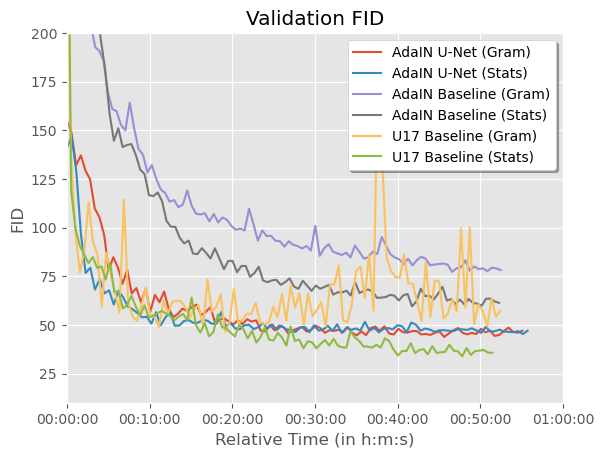

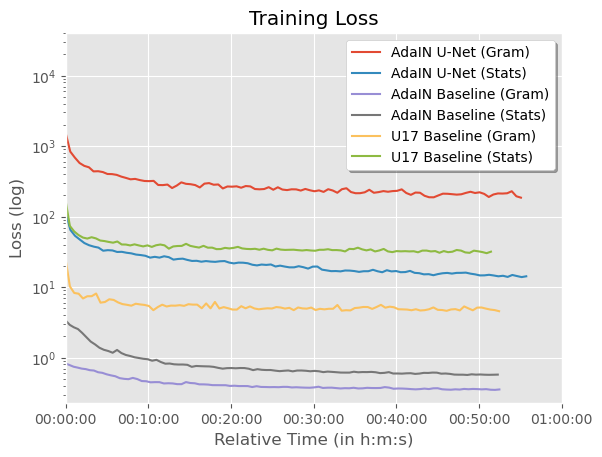

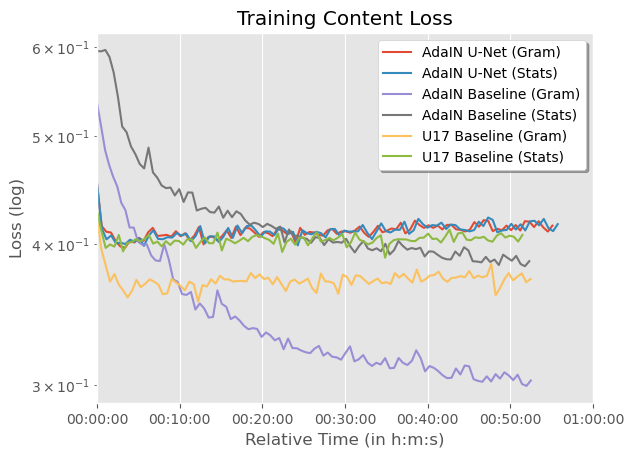

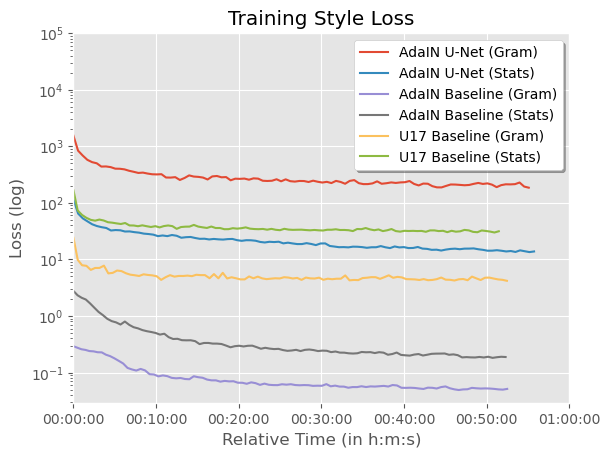

In [7]:
d = {
    "AdaIN U-Net (Gram)": "leishmania/unet/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "AdaIN U-Net (Stats)": "leishmania/unet/adain_loss/lr:0.001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "AdaIN Baseline (Gram)": "leishmania/adain/gram_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "AdaIN Baseline (Stats)": "leishmania/adain/adain_loss/lr:0.0005-style_weight:1.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "U17 Baseline (Gram)": "leishmania/u17/gram_loss/lr:0.001-style_weight:10000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    "U17 Baseline (Stats)": "leishmania/u17/adain_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/best"
plot_dict(d, "./data/val-fid", "Validation FID", "FID", False, f"{save_prefix}_fid.png", ylim=200)
plot_dict(d, "./data/loss-total", "Training Loss", "Loss", True, f"{save_prefix}_loss.png", ylim=4e4)
plot_dict(d, "./data/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}_content.png")
plot_dict(d, "./data/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}_style.png", ylim=1e5)

# AdaIN U-Net

## Gram Loss

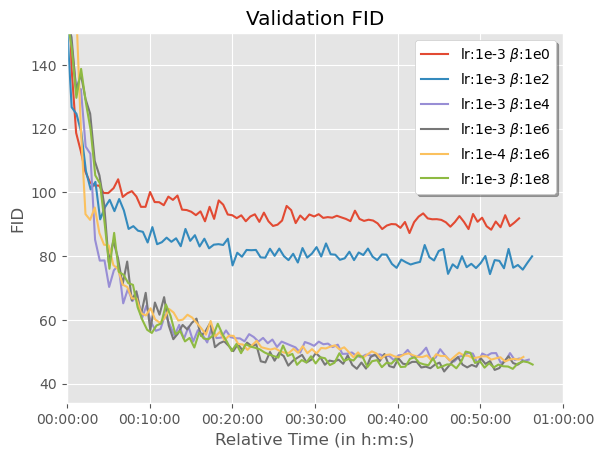

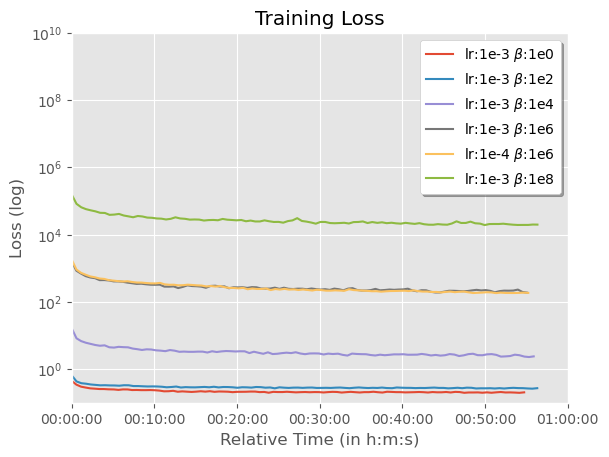

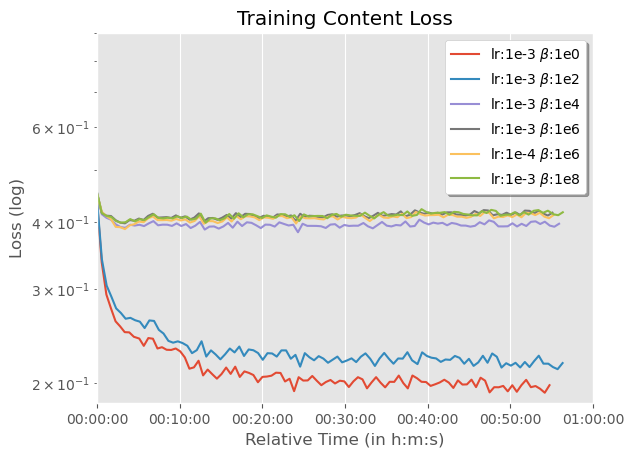

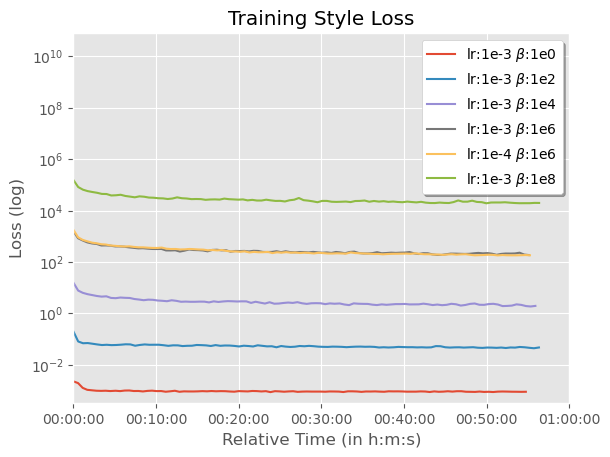

In [25]:
d = {
    r"lr:1e-3 $\beta$:1e0": "leishmania/unet/gram_loss/lr:0.001-style_weight:1.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e2": "leishmania/unet/gram_loss/lr:0.001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e4": "leishmania/unet/gram_loss/lr:0.001-style_weight:10000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e6": "leishmania/unet/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-4 $\beta$:1e6": "leishmania/unet/gram_loss/lr:0.0001-style_weight:1000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e8": "leishmania/unet/gram_loss/lr:0.001-style_weight:100000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/adain_unet_gram"
plot_dict(d, "./data/val-fid", "Validation FID", "FID", False, f"{save_prefix}_fid.png", ylim=150)
plot_dict(d, "./data/loss-total", "Training Loss", "Loss", True, f"{save_prefix}_loss.png", ylim=1e10)
plot_dict(d, "./data/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}_content.png", ylim=0.9)
plot_dict(d, "./data/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}_style.png", ylim=8e10)

## AdaIN Loss

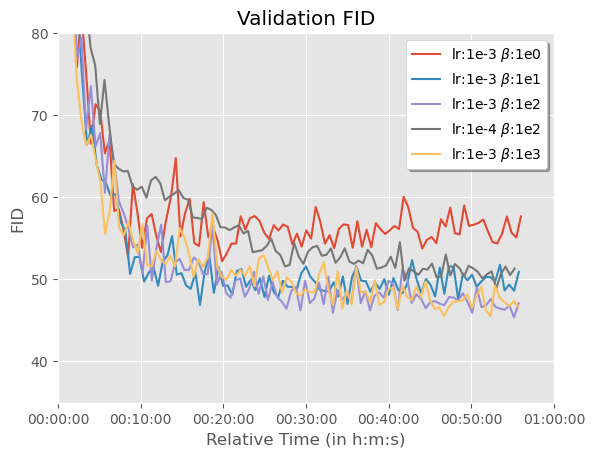

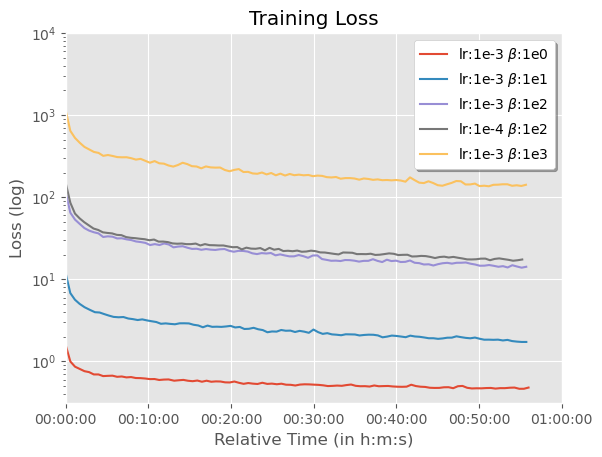

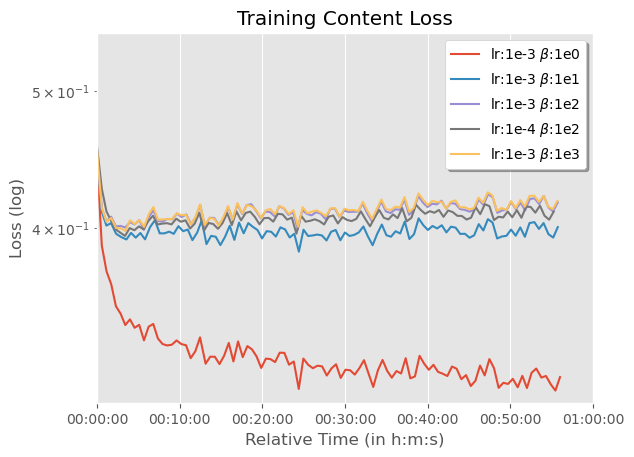

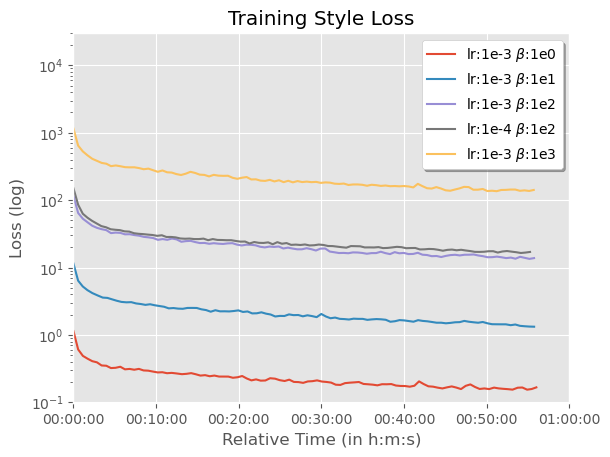

In [27]:
d = {
    r"lr:1e-3 $\beta$:1e0": "leishmania/unet/adain_loss/lr:0.001-style_weight:1.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e1": "leishmania/unet/adain_loss/lr:0.001-style_weight:10.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e2": "leishmania/unet/adain_loss/lr:0.001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-4 $\beta$:1e2": "leishmania/unet/adain_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e3": "leishmania/unet/adain_loss/lr:0.001-style_weight:1000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/adain_unet_adain"
plot_dict(d, "./data/val-fid", "Validation FID", "FID", False, f"{save_prefix}_fid.png", ylim=80)
plot_dict(d, "./data/loss-total", "Training Loss", "Loss", True, f"{save_prefix}_loss.png", ylim=1e4)
plot_dict(d, "./data/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}_content.png", ylim=0.55)
plot_dict(d, "./data/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}_style.png", ylim=3e4)

# AdaIN Baseline

## Gram Loss

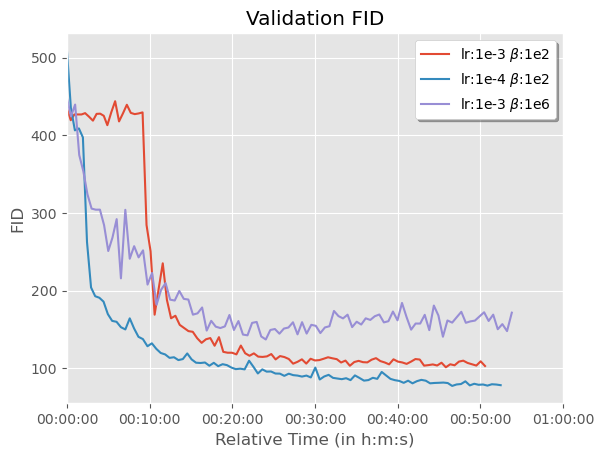

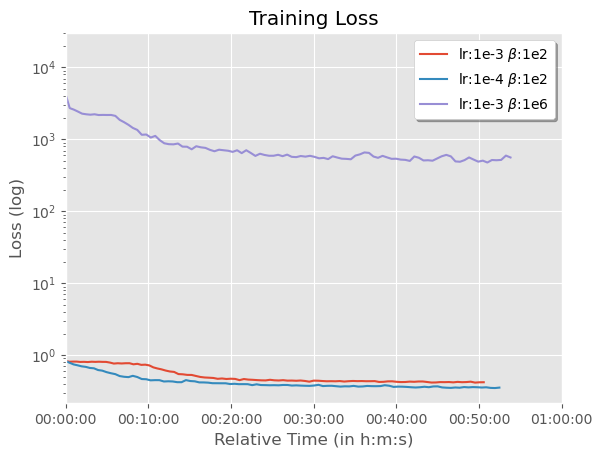

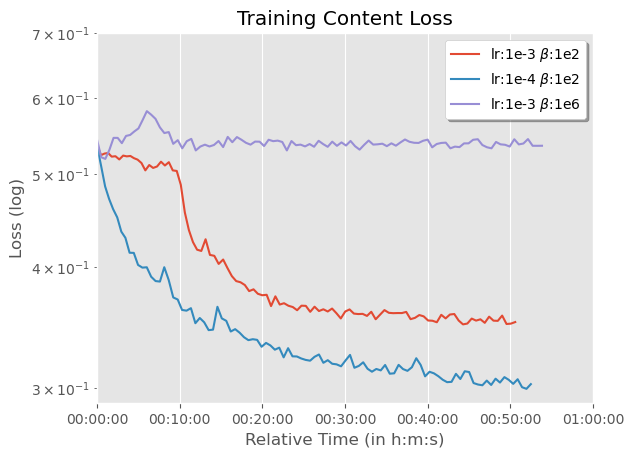

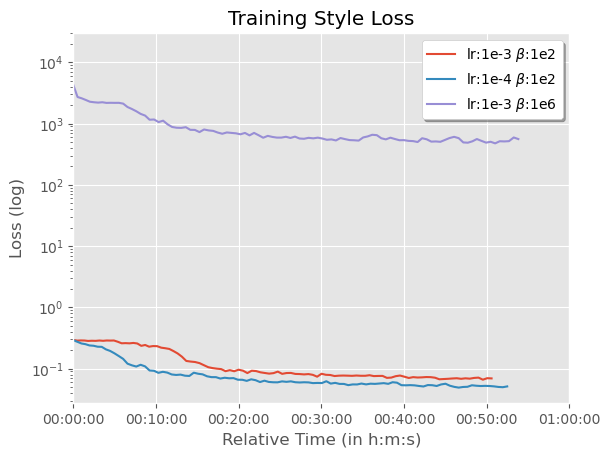

In [15]:
d = {
    r"lr:1e-3 $\beta$:1e2": "leishmania/adain/gram_loss/lr:0.001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-4 $\beta$:1e2": "leishmania/adain/gram_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e6": "leishmania/adain/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/adain_base_gram"
plot_dict(d, "./data/val-fid", "Validation FID", "FID", False, f"{save_prefix}_fid.png")
plot_dict(d, "./data/loss-total", "Training Loss", "Loss", True, f"{save_prefix}_loss.png", ylim=3e4)
plot_dict(d, "./data/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}_content.png", ylim=0.7)
plot_dict(d, "./data/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}_style.png", ylim=3e4)

## Adain Loss

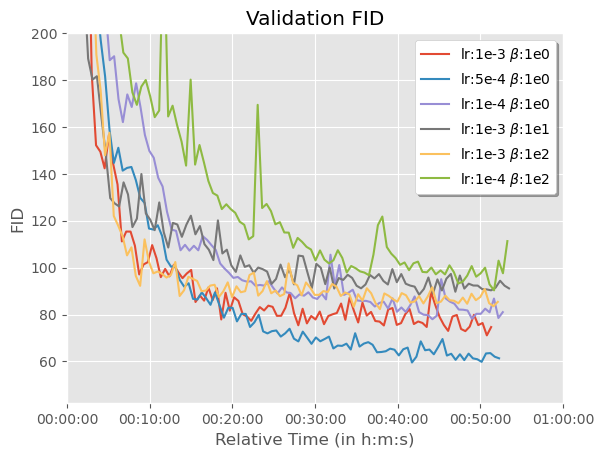

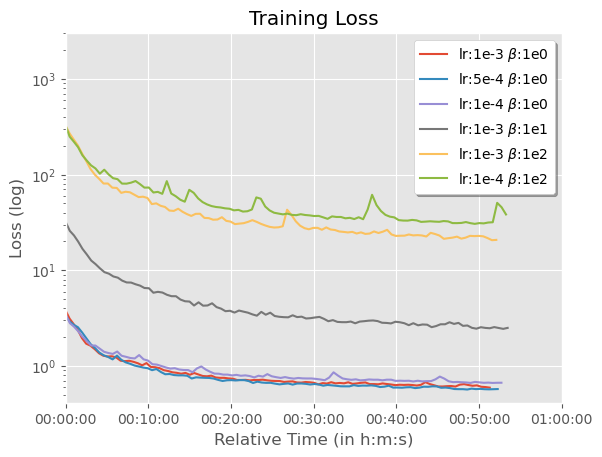

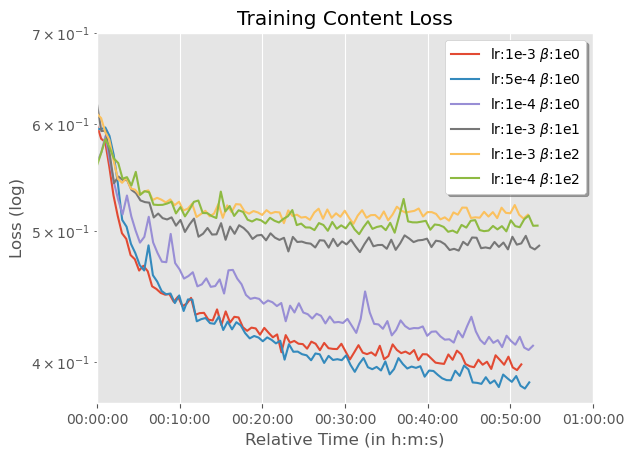

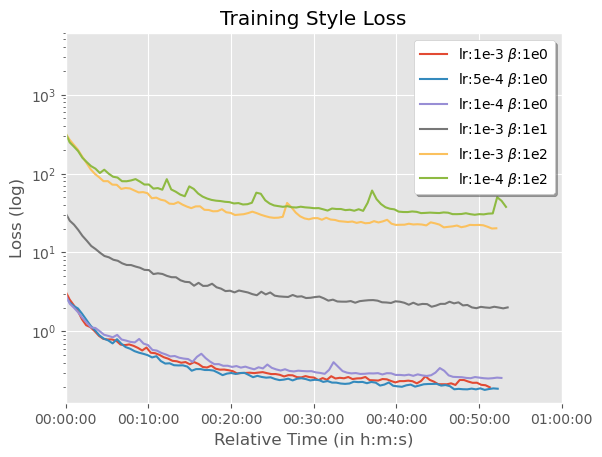

In [29]:
d = {
    r"lr:1e-3 $\beta$:1e0": "leishmania/adain/adain_loss/lr:0.001-style_weight:1.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:5e-4 $\beta$:1e0": "leishmania/adain/adain_loss/lr:0.0005-style_weight:1.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-4 $\beta$:1e0": "leishmania/adain/adain_loss/lr:0.0001-style_weight:1.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e1": "leishmania/adain/adain_loss/lr:0.001-style_weight:10.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e2": "leishmania/adain/adain_loss/lr:0.001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-4 $\beta$:1e2": "leishmania/adain/adain_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/adain_base_adain"
plot_dict(d, "./data/val-fid", "Validation FID", "FID", False, f"{save_prefix}_fid.png", ylim=200)
plot_dict(d, "./data/loss-total", "Training Loss", "Loss", True, f"{save_prefix}_loss.png", ylim=3e3)
plot_dict(d, "./data/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}_content.png", ylim=0.7)
plot_dict(d, "./data/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}_style.png", ylim=6e3)

# U22 Baseline

## Gram Loss

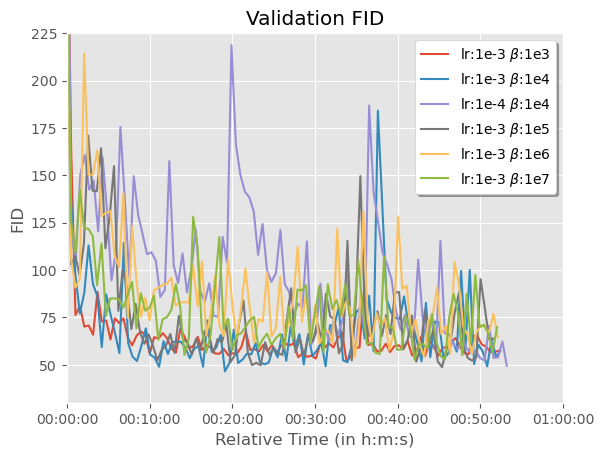

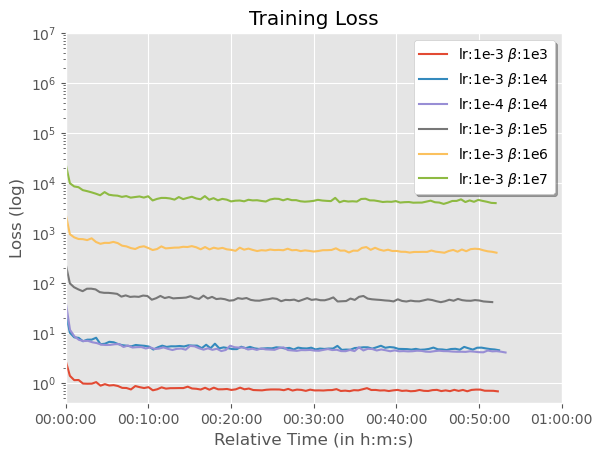

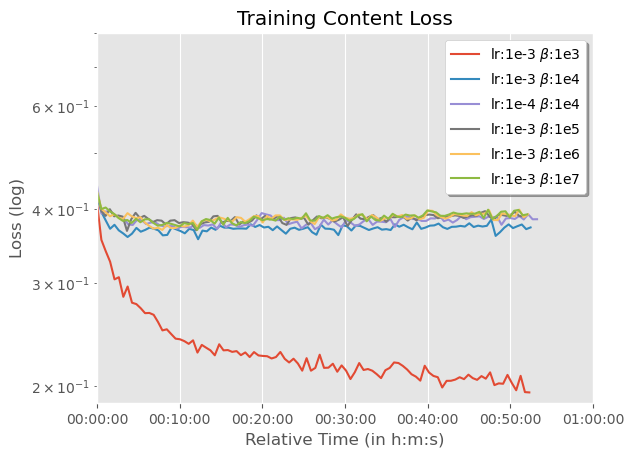

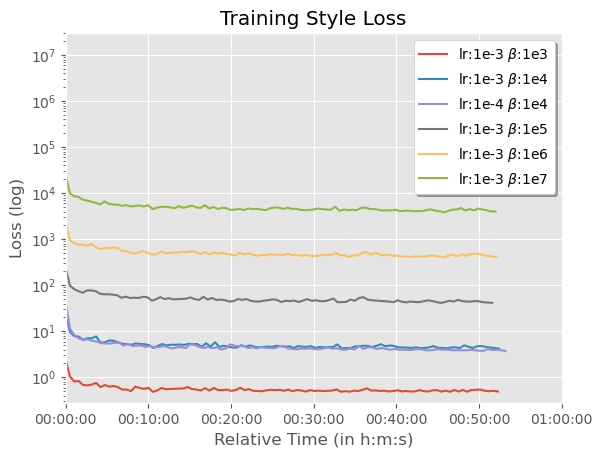

In [35]:
d = {
    r"lr:1e-3 $\beta$:1e3": "leishmania/u17/gram_loss/lr:0.001-style_weight:1000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e4": "leishmania/u17/gram_loss/lr:0.001-style_weight:10000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-4 $\beta$:1e4": "leishmania/u17/gram_loss/lr:0.0001-style_weight:10000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e5": "leishmania/u17/gram_loss/lr:0.001-style_weight:100000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e6": "leishmania/u17/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e7": "leishmania/u17/gram_loss/lr:0.001-style_weight:10000000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/u17_gram"
plot_dict(d, "./data/val-fid", "Validation FID", "FID", False, f"{save_prefix}_fid.png", ylim=225)
plot_dict(d, "./data/loss-total", "Training Loss", "Loss", True, f"{save_prefix}_loss.png", ylim=1e7)
plot_dict(d, "./data/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}_content.png", ylim=8e-1)
plot_dict(d, "./data/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}_style.png", ylim=3e7)

## AdaIN Loss

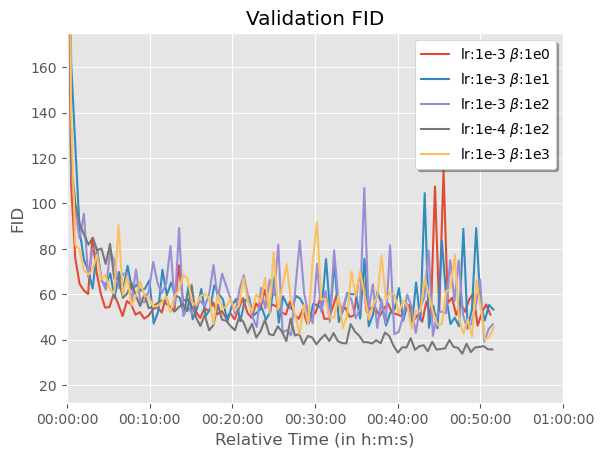

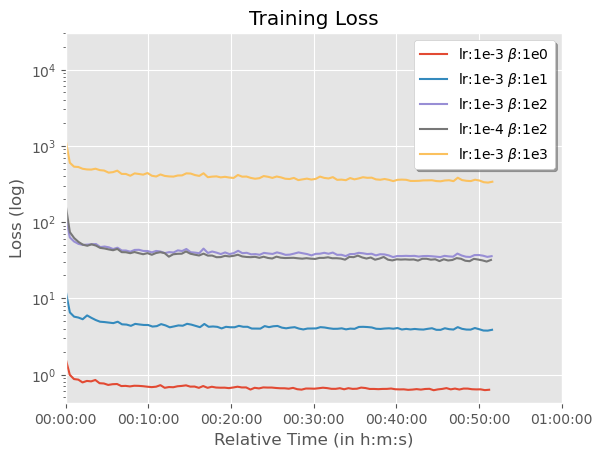

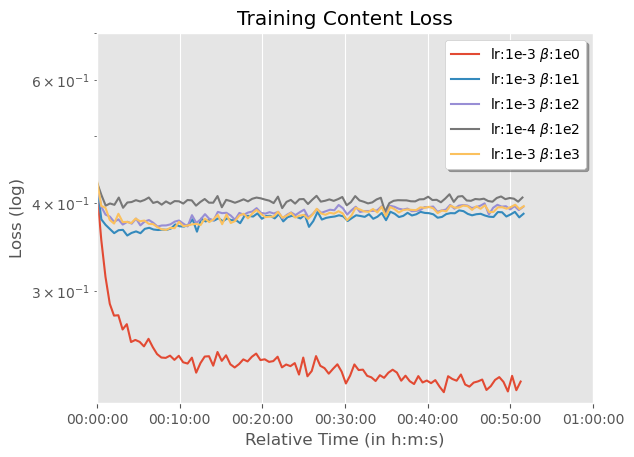

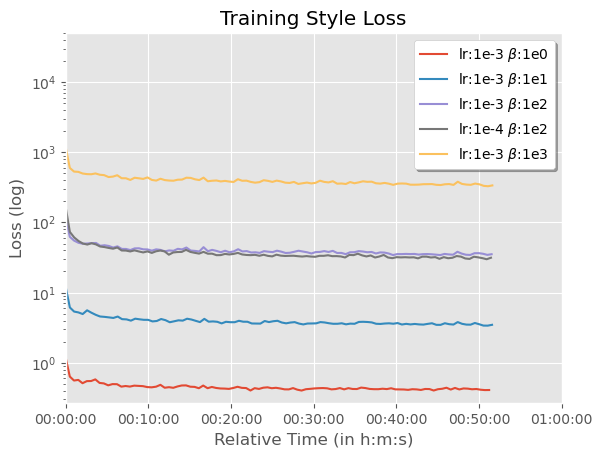

In [34]:
d = {
    r"lr:1e-3 $\beta$:1e0": "leishmania/u17/adain_loss/lr:0.001-style_weight:1.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e1": "leishmania/u17/adain_loss/lr:0.001-style_weight:10.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e2": "leishmania/u17/adain_loss/lr:0.001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-4 $\beta$:1e2": "leishmania/u17/adain_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
    r"lr:1e-3 $\beta$:1e3": "leishmania/u17/adain_loss/lr:0.001-style_weight:1000.0-weight_decay:0-lr_decay:1/version_0".replace("/", "_").replace(":", "_") + ".csv",
}
save_prefix = "./training/u17_adain"
plot_dict(d, "./data/val-fid", "Validation FID", "FID", False, f"{save_prefix}_fid.png", ylim=175)
plot_dict(d, "./data/loss-total", "Training Loss", "Loss", True, f"{save_prefix}_loss.png", ylim=3e4)
plot_dict(d, "./data/loss-content", "Training Content Loss", "Loss", True, f"{save_prefix}_content.png", ylim=7e-1)
plot_dict(d, "./data/loss-style", "Training Style Loss", "Loss", True, f"{save_prefix}_style.png", ylim=5e4)